# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July 15th 2021

<hr style="border:1px solid black"> </hr>


In [ ]:
Name: Myriam Iliana Ibanez Rios

In [1]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Explore the data [35 points]

Upload the the <code>breast_cancer_expression</code> into a Dataframe. This dataset contains the log-transformed expresions of $M$ for $N$ patients.

<hr>

### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [4]:
fn = "Dataset/breast_cancer_expression.tsv"
data_breast_exp = pd.read_csv(fn, sep= "\t")
data_breast_exp

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [5]:
data_breast_exp.shape

(645, 47)

How many patients are you considering?
645 patients
How many genes are you considering?
47 genes

In [57]:
for i in range(48): 
    for j in range (i+1, 46 ):
        x_breast_exp = data_breast_exp.iloc[:,i]
        y_breast_exp = data_breast_exp.iloc[:,j] 
        corr = np.corrcoef(x_breast_exp,y_breast_exp)
        corr_score = pd.DataFrame(corr).iloc[0,1]
        if corr_score >= 0.9:
            print("Gene 1:", data_breast_exp.columns[i], "Gene 2:", data_breast_exp.columns[j] )
            print("Rvalue:", corr_score)
            

Gene 1: ENSG00000115648.12 Gene 2: ENSG00000129514.5
Rvalue: 0.9071810120632685
Gene 1: ENSG00000117399.12 Gene 2: ENSG00000142945.11
Rvalue: 0.9176074418537264


<hr>

### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plote a comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

In [ ]:
#Plot 1
#First, we can visualy demontrate what we obtained in the first part byt plotting the linear correlation.
#Here we can observe that effectively they have a high correlation.

Text(0, 0.5, 'Gene ENSG00000142945.11')

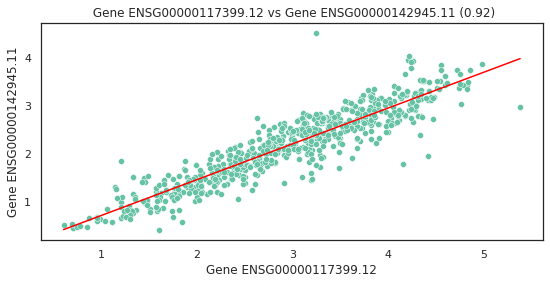

In [65]:
## Do a linear regression
x = data_breast_exp["ENSG00000117399.12"]
y = data_breast_exp["ENSG00000142945.11"]

reg = scipy.stats.linregress(x=x, y=y)

y_own = reg.slope * x + reg.intercept
# plot the data
sns.scatterplot(data=data_breast_exp, x=x, y=y)
sns.lineplot(x=x,y=y_own, color="red")
plt.title(" Gene ENSG00000117399.12 vs Gene ENSG00000142945.11 (%.2f)" % (reg.rvalue))
plt.xlabel("Gene ENSG00000117399.12")
plt.ylabel("Gene ENSG00000142945.11")


In [ ]:
#Plot 2 We want to look at the expression of each of the genes.

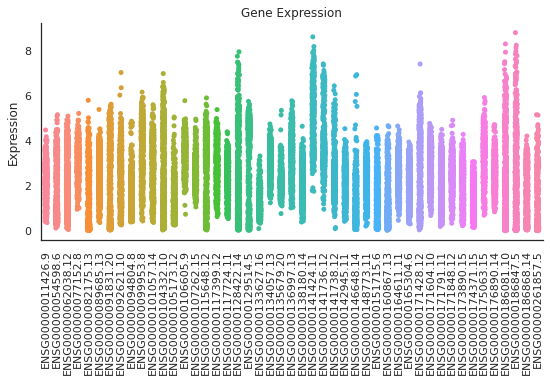

In [72]:
sns.stripplot(data=data_breast_exp)
plt.xticks(rotation=90)
plt.title("Gene Expression")
plt.ylabel("Expression")
sns.despine()

<hr style="border:1px solid black"> </hr>

## Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [77]:
#I am going to perform PCA to reduce the dimensionality of my dataset. 
pca = sklearn.decomposition.PCA()
pca.fit(data_breast_exp)

PCA()

In [78]:
# Explained_variance
pca.explained_variance_ratio_

array([0.4895715 , 0.12409806, 0.06368292, 0.05613526, 0.02674681,
       0.02349905, 0.01876769, 0.01808656, 0.01589495, 0.0138722 ,
       0.01155553, 0.01151328, 0.01092356, 0.00948607, 0.00818814,
       0.00788844, 0.00687269, 0.00630469, 0.00607351, 0.00554516,
       0.00513478, 0.00497124, 0.00440353, 0.00410735, 0.00397289,
       0.00371193, 0.00355187, 0.00335561, 0.00313826, 0.00301558,
       0.0028311 , 0.00261559, 0.0022757 , 0.00221418, 0.00197918,
       0.00185797, 0.00170669, 0.00153196, 0.00147302, 0.00125764,
       0.00119496, 0.00109755, 0.0010269 , 0.00087041, 0.00072448,
       0.00071363, 0.00055994])

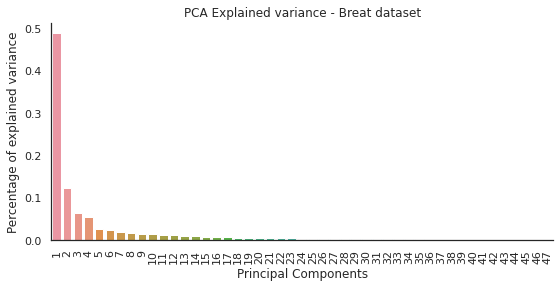

In [82]:
sns.barplot(x=np.arange(1,48), y=pca.explained_variance_ratio_)
plt.title("PCA Explained variance - Breat dataset")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
plt.xticks(rotation=90)
sns.despine()

In [ ]:
##Here we can see that high percentage of our information is stored in our first 12 PCA.

In [118]:
reduce_breast = pca.transform(data_breast_exp)
reduce_breast = pd.DataFrame(reduce_breast)
# We need to apply the transformation of out data
reduce_breast.shape

(645, 47)

In [119]:
X = reduce_breast.iloc[:, 0:48]

In [106]:
##I will look for the best number of clusters by doing fisrt a for loop and then an elbow plot.
inertia_list = []

for k in range(1,11) :
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(X)
    inertia_list += [kmeans.inertia_]

Text(0, 0.5, 'Inertia')

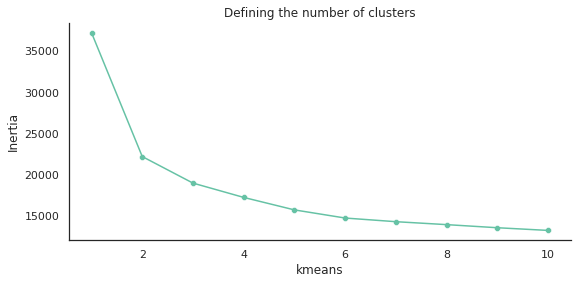

In [107]:
### Plot K vs. interti
sns.scatterplot(x=np.arange(1,11), y=inertia_list)
sns.lineplot(x=np.arange(1,11), y=inertia_list)
sns.despine()
plt.title("Defining the number of clusters")
plt.xlabel("kmeans")
plt.ylabel("Inertia")

In [120]:
## k = 5y looks like the best number.
k=5
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

In [121]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [122]:
reduce_breast["cluster"]=kmeans.labels_
reduce_breast

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,cluster
0,9.264688,2.231807,0.964991,-2.131075,-0.098354,1.069809,0.605815,-1.029693,0.544319,-0.256190,...,-0.346789,-0.098423,0.918352,0.187434,-0.424231,0.156743,-0.088714,-0.202160,-0.154234,3
1,7.794874,0.732082,-1.141297,1.332433,1.271122,0.469944,0.632577,0.010944,1.241624,0.794444,...,-0.178576,0.156716,0.311776,0.244172,-0.332960,0.425786,0.150019,0.444819,-0.158334,3
2,8.005062,-2.458199,-2.821219,2.396689,0.219696,-0.285557,0.371973,0.374003,0.672532,-0.350341,...,0.096526,0.043821,-0.194599,-0.241069,-0.097057,-0.176216,0.200189,0.491736,0.039126,3
3,8.321142,-1.284390,-1.042043,-1.083681,0.406203,2.204460,0.271024,0.556414,1.756337,0.963701,...,-0.073659,0.274866,0.107674,-0.535071,-0.246774,-0.015794,0.056308,0.117882,-0.140260,3
4,3.576266,-2.089123,-2.808648,6.931476,-0.344832,0.817378,-1.408007,2.899480,-1.895153,-0.263459,...,0.099727,0.060081,-0.103643,0.188989,-0.066659,-0.593408,0.010863,-0.545634,0.032241,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1.133602,7.964754,1.929736,-1.109872,0.686706,-1.740159,0.140004,0.273140,1.161577,-1.165051,...,-0.035141,0.067141,-0.059744,-0.130458,0.089120,-0.047592,-0.097969,-0.108243,0.046450,4
641,3.170828,3.248832,1.500530,-2.643236,-0.104649,-0.186207,0.489494,-0.155189,0.220720,-2.072617,...,-0.339486,0.761996,-0.060017,0.062107,-0.054606,-0.065017,-0.174109,0.156648,-0.196188,4
642,1.586072,7.394928,2.972734,-0.559862,0.858476,0.258948,-0.693968,0.115288,0.101900,0.336974,...,0.158151,0.150882,-0.169768,-0.117347,-0.126480,-0.024956,0.077154,0.008530,0.059293,4
643,1.245953,3.402544,4.942678,0.988805,-0.494954,0.737549,-0.327824,0.902547,0.177132,-1.832936,...,-0.229889,0.500201,-0.023648,0.241192,0.192034,0.033169,-0.055623,0.028116,-0.193674,4


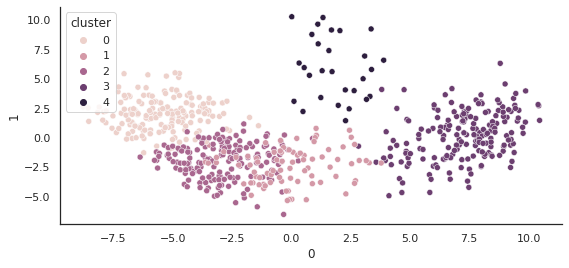

In [123]:
#Visualize the data by looking at the clusters position
sns.scatterplot(data=reduce_breast, x=0, y=1, hue="cluster")
sns.despine()

In [ ]:
##Here we can see that apparently each cluster is well defined but we can't conclude anything, 
##we need further information to corraborate that.

<hr>

### Part 2 [20 points]

After doing some reasearch in the online public database where you collected the patient expression data, you were able to extract a list of breast cancer subtype assossiated to each of your patient.

Upload the <code>breast_cancer_subtype</code> data and incorporate it to your expression data. Having this new information, re-do your clustering analysis.

Are you able to link each found cluster to a cancer subtype?

In [137]:
fn = "Dataset/breast_cancer_subtype.tsv"
data_breast_subtype = pd.read_csv(fn, sep= "\t", header = None)


In [138]:
reduce_breast["Tumor Subtype"] = data_breast_subtype
reduce_breast


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,cluster,Tumor Subtype
0,9.264688,2.231807,0.964991,-2.131075,-0.098354,1.069809,0.605815,-1.029693,0.544319,-0.256190,...,-0.098423,0.918352,0.187434,-0.424231,0.156743,-0.088714,-0.202160,-0.154234,3,Basal
1,7.794874,0.732082,-1.141297,1.332433,1.271122,0.469944,0.632577,0.010944,1.241624,0.794444,...,0.156716,0.311776,0.244172,-0.332960,0.425786,0.150019,0.444819,-0.158334,3,Basal
2,8.005062,-2.458199,-2.821219,2.396689,0.219696,-0.285557,0.371973,0.374003,0.672532,-0.350341,...,0.043821,-0.194599,-0.241069,-0.097057,-0.176216,0.200189,0.491736,0.039126,3,Basal
3,8.321142,-1.284390,-1.042043,-1.083681,0.406203,2.204460,0.271024,0.556414,1.756337,0.963701,...,0.274866,0.107674,-0.535071,-0.246774,-0.015794,0.056308,0.117882,-0.140260,3,Basal
4,3.576266,-2.089123,-2.808648,6.931476,-0.344832,0.817378,-1.408007,2.899480,-1.895153,-0.263459,...,0.060081,-0.103643,0.188989,-0.066659,-0.593408,0.010863,-0.545634,0.032241,3,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1.133602,7.964754,1.929736,-1.109872,0.686706,-1.740159,0.140004,0.273140,1.161577,-1.165051,...,0.067141,-0.059744,-0.130458,0.089120,-0.047592,-0.097969,-0.108243,0.046450,4,Normal
641,3.170828,3.248832,1.500530,-2.643236,-0.104649,-0.186207,0.489494,-0.155189,0.220720,-2.072617,...,0.761996,-0.060017,0.062107,-0.054606,-0.065017,-0.174109,0.156648,-0.196188,4,Normal
642,1.586072,7.394928,2.972734,-0.559862,0.858476,0.258948,-0.693968,0.115288,0.101900,0.336974,...,0.150882,-0.169768,-0.117347,-0.126480,-0.024956,0.077154,0.008530,0.059293,4,Normal
643,1.245953,3.402544,4.942678,0.988805,-0.494954,0.737549,-0.327824,0.902547,0.177132,-1.832936,...,0.500201,-0.023648,0.241192,0.192034,0.033169,-0.055623,0.028116,-0.193674,4,Normal


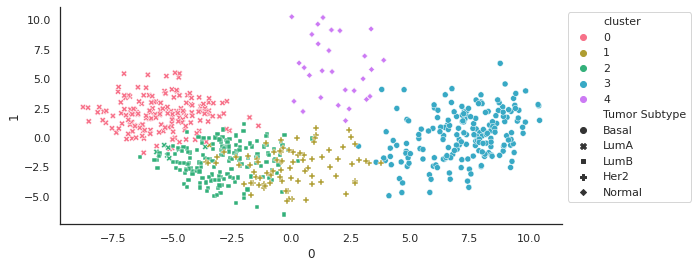

In [142]:
sns.scatterplot(data=reduce_breast, x=0, y=1, hue="cluster", style="Tumor Subtype", palette= sns.color_palette("husl", 5))
plt.legend(bbox_to_anchor=(1,1))
sns.despine()

In [ ]:
## Here we can see that our number of clusters match with our different tumor suptypes.

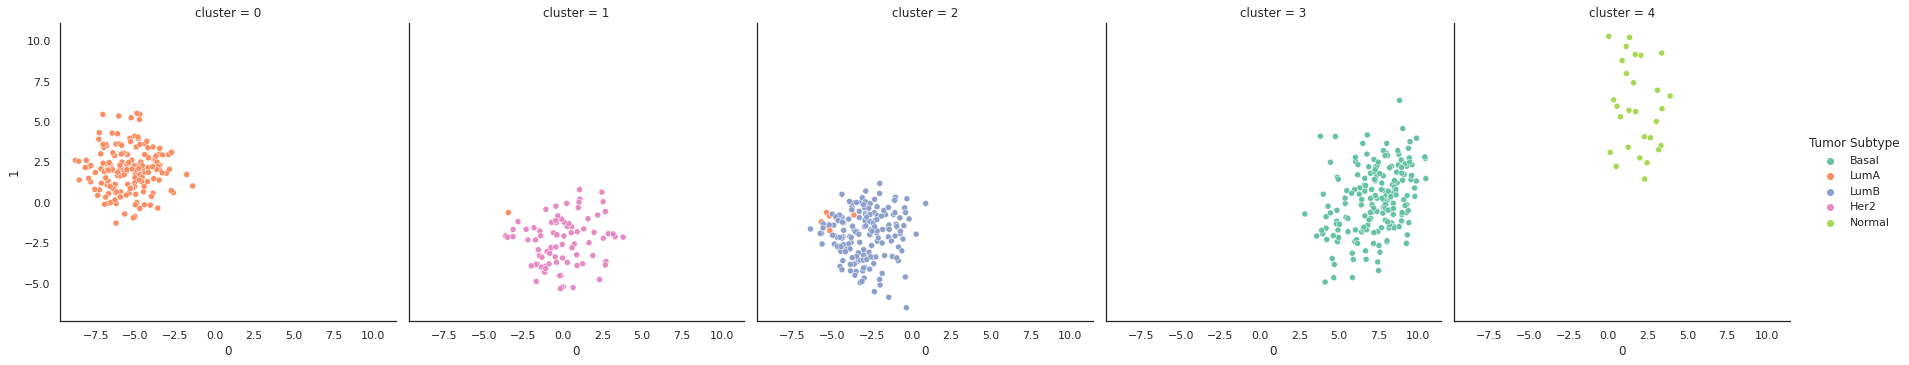

In [143]:
sns.relplot(data=reduce_breast, x=0, y=1, hue="Tumor Subtype", col="cluster")
sns.despine()

In [ ]:
##For better visualization, we can plot each cluster indicating by color the tumor subtype. We can see that the separation is
##almost perfect.

<hr>

### Part 3 [10 points]

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

In [160]:
data_breast_exp["Tumor Subtype"] = data_breast_subtype
col_name = ["ENSG00000115648.12", "ENSG00000129514.5"]
data_Basal = data_breast_exp[data_breast_exp["Tumor Subtype"]=="Basal"][col_name]
data_LumA = data_breast_exp[data_breast_exp["Tumor Subtype"]=="LumA"][col_name]
data_LumB = data_breast_exp[data_breast_exp["Tumor Subtype"]=="LumB"][col_name]
data_Her2 = data_breast_exp[data_breast_exp["Tumor Subtype"]=="Her2"][col_name]
data_Normal = data_breast_exp[data_breast_exp["Tumor Subtype"]=="Normal"][col_name]


Normal


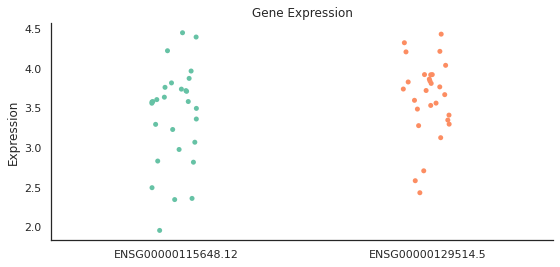

Normal


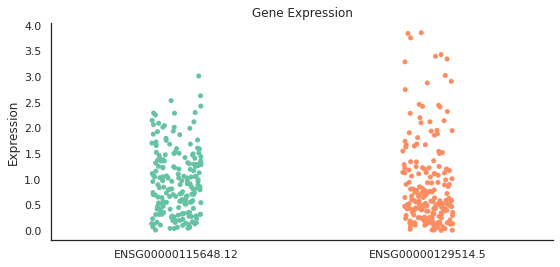

Normal


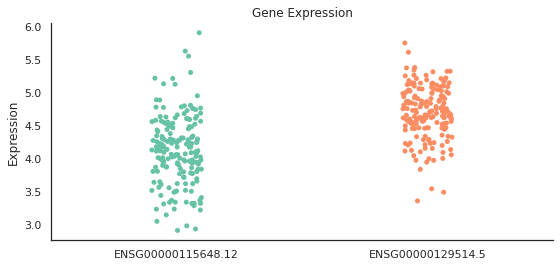

Normal


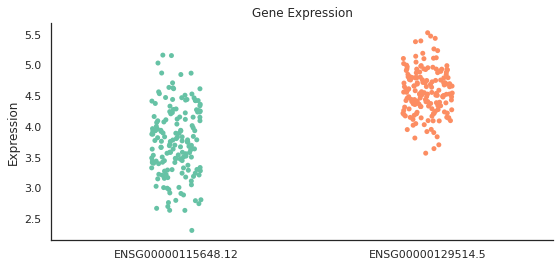

Normal


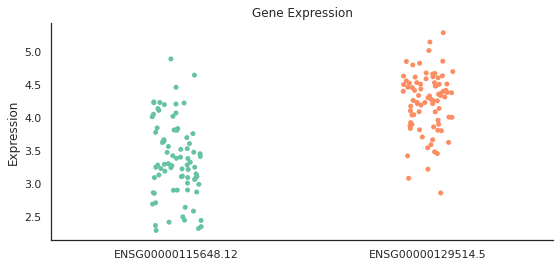

In [185]:
data = [data_Normal, data_Basal, data_LumA, data_LumB, data_Her2]
Names = ["Normal", "Basal", "LumA", "LumB", "Her2"]
for i in data:
    for j in Names:
        print(j)
        sns.stripplot( data = i )
        plt.title("Gene Expression")
        plt.ylabel("Expression")
        sns.despine()
        plt.show()
        break

In [ ]:
## we can observe that apparently the expression of the selecterd pair of genes is mantained during the 5 cancer subtypes

<hr>

### Part 4 [10 points]

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are the identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work [5 points]

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!